In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import cv2
import pathlib
import PIL

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url="/content/drive/MyDrive/Pneumonia/Pediatric Chest X-ray Pneumonia/train"

In [ ]:
url=pathlib.Path(url)

In [ ]:
data={"NORMAL":list(url.glob("NORMAL/*")),
      "PNEUMONIA":list(url.glob("PNEUMONIA/*"))[:2000]}

In [ ]:
data_index={"NORMAL":0,"PNEUMONIA":1}

In [ ]:
len(data["NORMAL"])

1349

In [ ]:
len(data["PNEUMONIA"])

2000

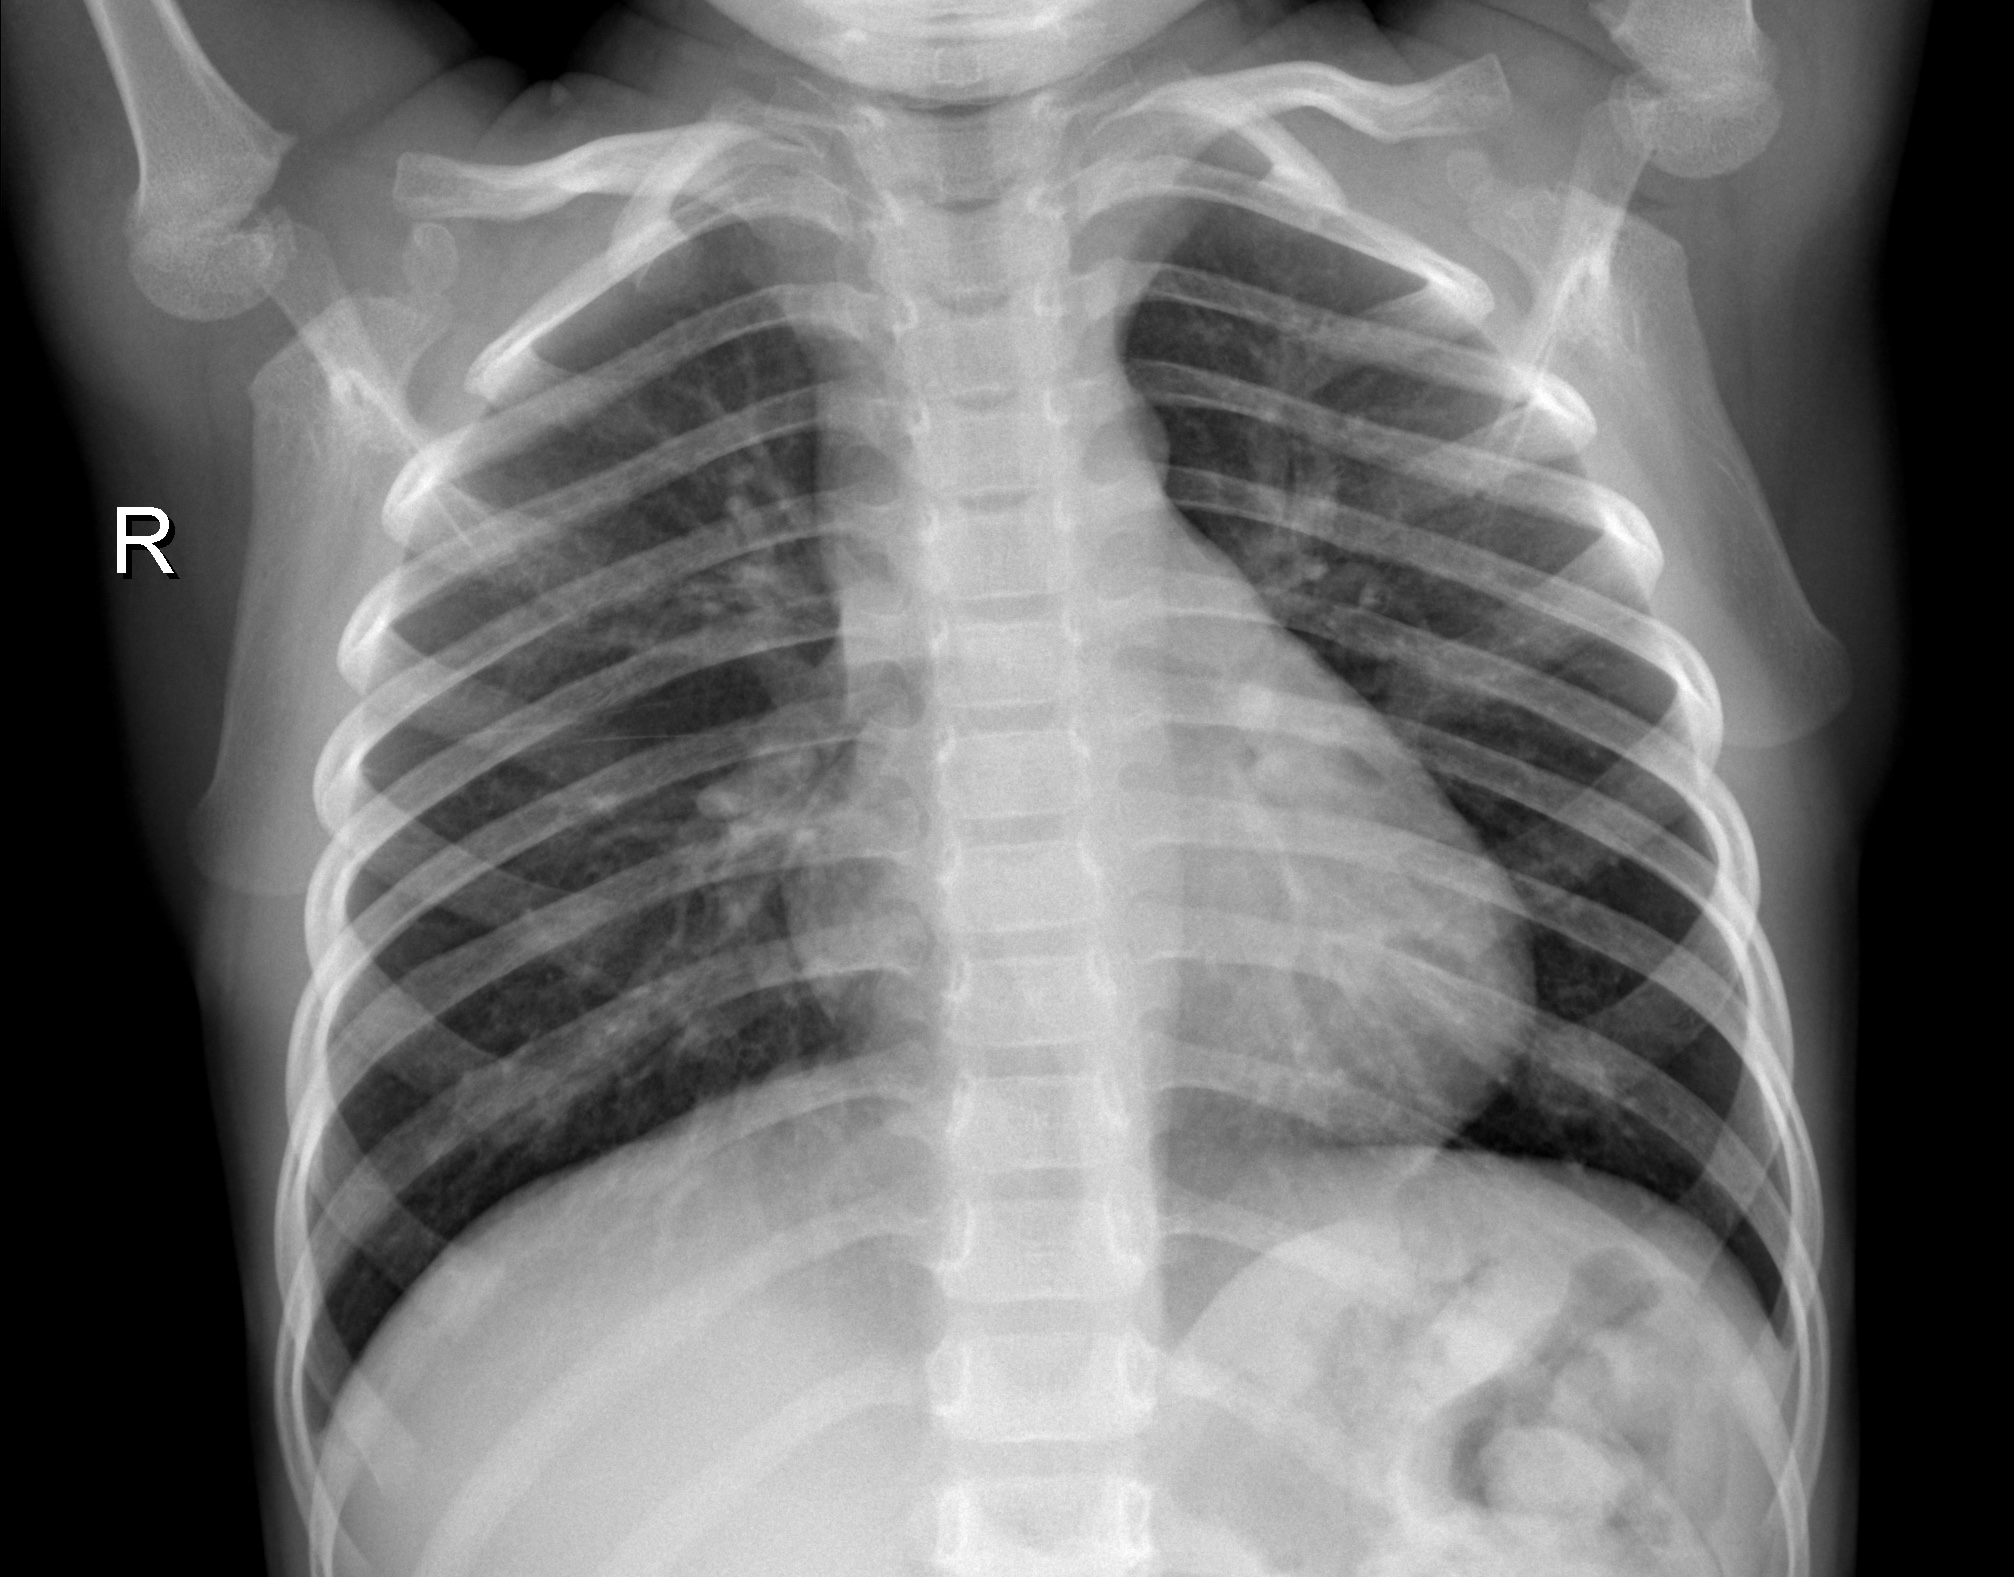

In [ ]:
PIL.Image.open(data["NORMAL"][0])

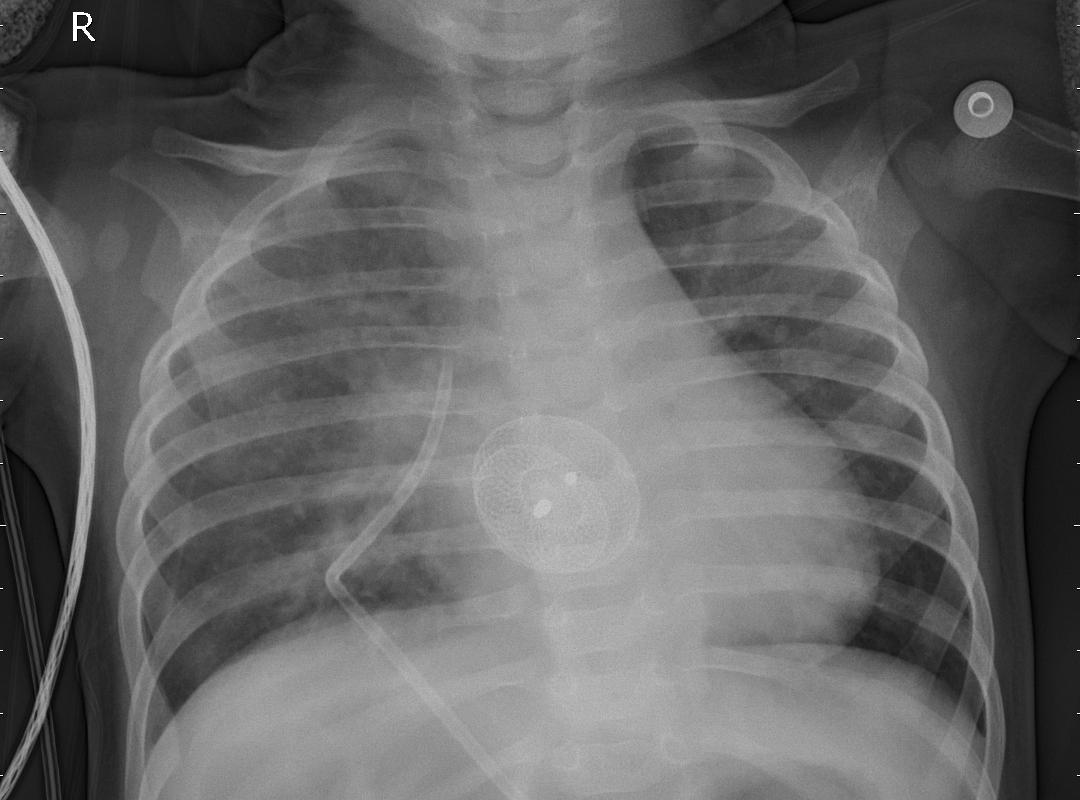

In [ ]:
PIL.Image.open(data["PNEUMONIA"][0])

In [ ]:
x,y=[],[]
for name,lis in data.items():
  for l in lis:
    img_arr=cv2.imread(str(l))
    img_res=cv2.resize(img_arr,(224,224))
    x.append(img_res)
    y.append(data_index[name])

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x=x/255

In [ ]:
x.shape

(3349, 224, 224, 3)

In [ ]:
y.shape

(3349,)

In [ ]:
x.dtype

dtype('float64')

In [ ]:
y.dtype

dtype('int64')

In [ ]:
import tensorflow_hub as hub

In [ ]:
data_augmentation=keras.Sequential([
        keras.layers.experimental.preprocessing.RandomRotation(45),
        #keras.layers.experimental.preprocessing.RandomCrop(0.25),
        keras.layers.experimental.preprocessing.RandomContrast(0.5)
])

In [ ]:
model=keras.Sequential([
        data_augmentation,
        hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",trainable=False,input_shape=(224,224,3)),
        keras.layers.Dense(1,activation="sigmoid")            
])
model.compile(optimizer="adam",loss="BinaryCrossentropy",metrics=["accuracy"])
model.fit(x,y,epochs=25)

Epoch 1/25
105/105 [==============================] - 45s 93ms/step - loss: 0.3594 - accuracy: 0.8355
Epoch 2/25
105/105 [==============================] - 9s 85ms/step - loss: 0.2283 - accuracy: 0.9131
Epoch 3/25
105/105 [==============================] - 9s 86ms/step - loss: 0.1965 - accuracy: 0.9239
Epoch 4/25
105/105 [==============================] - 9s 86ms/step - loss: 0.1976 - accuracy: 0.9209
Epoch 5/25
105/105 [==============================] - 9s 86ms/step - loss: 0.1843 - accuracy: 0.9319
Epoch 6/25
105/105 [==============================] - 9s 86ms/step - loss: 0.1726 - accuracy: 0.9310
Epoch 7/25
105/105 [==============================] - 9s 86ms/step - loss: 0.1688 - accuracy: 0.9313
Epoch 8/25
105/105 [==============================] - 9s 86ms/step - loss: 0.1605 - accuracy: 0.9373
Epoch 9/25
105/105 [==============================] - 9s 87ms/step - loss: 0.1728 - accuracy: 0.9313
Epoch 10/25
105/105 [==============================] - 9s 87ms/step - loss: 0.1524 - accur

In [ ]:
test_url="/content/drive/MyDrive/Pneumonia/Pediatric Chest X-ray Pneumonia/test"

In [ ]:
test_url=pathlib.Path(test_url)

In [ ]:
test_data={"NORMAL":list(test_url.glob("NORMAL/*")),
           "PNEUMONIA":list(test_url.glob("PNEUMONIA/*"))}

In [ ]:
x_test,y_test=[],[]
for nam,lis in test_data.items():
  for l in lis:
    img_arr=cv2.imread(str(l))
    img_res=cv2.resize(img_arr,(224,224))
    x_test.append(img_res)
    y_test.append(data_index[nam])

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
x_test=x_test/255

In [ ]:
model.evaluate(x_test,y_test)

20/20 [==============================] - 3s 124ms/step - loss: 0.3111 - accuracy: 0.8846


[0.311099648475647, 0.8846153616905212]

In [ ]:
x_test.shape

(624, 224, 224, 3)

In [ ]:
y_test.shape

(624,)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_pred=[]
for i in y_predict:
  if i[0]<0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [ ]:
y_pred=np.array(y_pred)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

0.8846153846153846


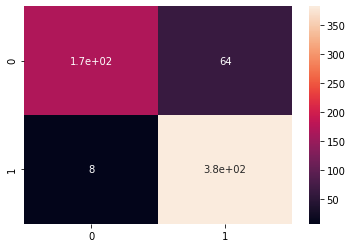

In [ ]:
sb.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(metrics.recall_score(y_test,y_pred))

0.9794871794871794
